# Step 1 to Navier-Stokes: Notes

Vector calculus review:

$$\nabla \bullet f(x, y, z) = \frac{\partial f}{\partial x} \hat{i} + \frac{\partial f}{\partial y} \hat{j} + \frac{\partial f}{\partial z} \hat{k}$$

}## Euler's Method
### Discretization

A differential equation operates over a domain. To run simulations (especially when there is no analytical solution), it is important to divide the domain into small steps (both temporally and spatially). This allows a computer to use approximate solutions to get from step to step.

### Node indexing

Each node in the domain has an index. For example, if the equation operates over one dimension of space and one dimension of time, we could denote each point in time with $i$ and each point in space with $j$. Then, any point in spacetime can be identified with $(i, j)$.

### Differential approximation

We all know that the equation for the derivative is:
$$\frac{df}{dx} = \lim{h \to 0} \frac{f(x + h) - f(x)}{h}$$

Imagine three adjacent points $x_{i-1}$, $x_i$, and $x_{i+1}$.

Forward difference: use $x_i$ and $x_{i+1}$

Backward difference: use $x_{i-1}$ and $x_i$

Central difference: use $x_{i-1}$ and $x_{i+1}$

In [5]:
import numpy
from matplotlib import pyplot
import time, sys

# Make plots appear inside notebook
%matplotlib inline

Consider the one-dimensional convection equation:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0$$

Where:

$x$ is distance on the x axis

$t$ is time

$u(x, t)$ is velocity

$c$ is wavefront velocity

Next, we want to define a one-dimensional spatial domain consisting of the x-axis. Let:

`l` be the length of the domain

`nx` be the number of points on the line

`dx` be the size of the interval between the points

`nt` be the length of time for which the simulation runs

`dt` be the physics time step

`c` be the wavespeed

Logically, then:

$$dx = \frac{l}{nx - 1}$$

In [6]:
l = 2
nx = 41
dx = l / (nx - 1)

nt = 25
dt = 0.025

c = 1

Initial conditions:

$$u_0 = 2,      0.5 \le x \le 1$$
$$u_0 = 1,      x < 0.5, x > 1$$

In [20]:
u = numpy.ones(nx)                          # Create an array of ones nx long
u[int(.5 / dx):int(1 / dx + 1)] = 2         # Set u between 0.5 and 1 to 2
print(u)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


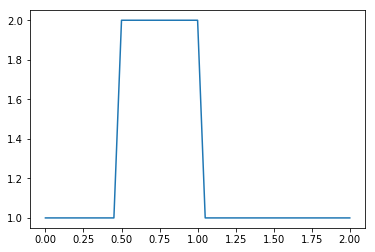

In [21]:
pyplot.plot(numpy.linspace(0, 2, nx), u)

The function does not have perfectly straight sides because there is a transition of width `dx`.

The notebook uses this confusing notation for each discretised point of $u(x, t)$: $$u^{n}_{i}$$

Essentially, $n$ represents the temporal index of the point, while $i$ represents the spatial index of the point.

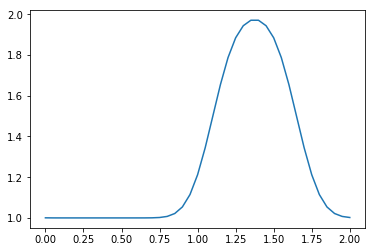

In [22]:
# Initialise an array to store solution for u for the current timestep
un = numpy.ones(nx)

# For all timesteps in nt:
for n in range(nt):
    # Copy all values of u into un
    un = u.copy()
    # For all spacesteps in nx:
    for i in range(1, nx):
        # This is a discretised equation obtained by solving the PDE
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
        
# Plot:
pyplot.plot(numpy.linspace(0, 2, nx), u)

This graph shows the graph of u vs x after 25 time units have passed.

Notice that the initial conditions show simply a block of fluid moving at a different velocity to the rest of the column, but now, the velocities have started to mix around.

## Full script

In [ ]:
import numpy
from matplotlib import pyplot
import time, sys

# Make plots appear inside notebook
%matplotlib inline

l = 2
nx = 1001
dx = l / (nx - 1)

nt = 45
dt = 0.001

c = 1

u = numpy.ones(nx)                          # Create an array of ones nx long
u[int(.5 / dx):int(1 / dx + 1)] = 2         # Set u between 0.5 and 1 to 2

# Initialise an array to store solution for u for the current timestep
un = numpy.ones(nx)

# For all timesteps in nt:
for n in range(int(nt/dt)):
    # Copy all values of u into un
    un = u.copy()
    # For all spacesteps in nx:
    for i in range(nx):
        # This is the discretised PDE
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
        
# Plot:
pyplot.plot(numpy.linspace(0, 2, nx), u)